<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_data(y_hat)_multi_delta_(_0_8)_n20_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_-0.8'

In [4]:
os.listdir(base_path)

['data_multi_delta_-0.8_n250.csv',
 'data_multi_delta_-0.8_n120.csv',
 'data_multi_delta_-0.8_n60.csv',
 'data_multi_delta_-0.8_n30.csv',
 'data_multi_delta_-0.8_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-0.8_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,86.835064,89.945358,68.992337,55.438958,0.194936,311.406654,311.358449,0.048204
1,0.0,1.0,64.724313,33.323362,69.631602,78.097750,0.063958,255.840986,255.692801,0.148185
2,0.0,2.0,50.211518,55.542778,80.818767,70.030354,0.151094,266.754509,266.604146,0.150363
3,0.0,3.0,45.175278,30.479705,71.743828,81.793404,-0.599094,238.593121,239.059247,-0.466126
4,0.0,4.0,38.645165,22.585102,90.238555,67.247292,0.522780,229.238895,228.671351,0.567544
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,98.104310,41.704504,75.701971,99.971224,0.656055,326.138064,325.868556,0.269508
19996,999.0,16.0,43.995566,35.006503,62.454936,82.180074,-0.036445,233.600634,233.844025,-0.243391
19997,999.0,17.0,87.432684,90.447398,80.827013,91.453535,0.089708,360.250337,360.479489,-0.229152
19998,999.0,18.0,76.050260,71.676393,63.753053,40.226713,0.015211,261.721630,261.717585,0.004044


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,86.835064,89.945358,68.992337,55.438958,0.194936,311.406654,311.358449,0.048204
1,0.0,1.0,64.724313,33.323362,69.631602,78.097750,0.063958,255.840986,255.692801,0.148185
2,0.0,2.0,50.211518,55.542778,80.818767,70.030354,0.151094,266.754509,266.604146,0.150363
3,0.0,3.0,45.175278,30.479705,71.743828,81.793404,-0.599094,238.593121,239.059247,-0.466126
4,0.0,4.0,38.645165,22.585102,90.238555,67.247292,0.522780,229.238895,228.671351,0.567544
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,98.104310,41.704504,75.701971,99.971224,0.656055,326.138064,325.868556,0.269508
19996,999.0,16.0,43.995566,35.006503,62.454936,82.180074,-0.036445,233.600634,233.844025,-0.243391
19997,999.0,17.0,87.432684,90.447398,80.827013,91.453535,0.089708,360.250337,360.479489,-0.229152
19998,999.0,18.0,76.050260,71.676393,63.753053,40.226713,0.015211,261.721630,261.717585,0.004044


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    86.835064  89.945358  68.992337  55.438958  0.194936  311.406654   
      1.0    64.724313  33.323362  69.631602  78.097750  0.063958  255.840986   
      2.0    50.211518  55.542778  80.818767  70.030354  0.151094  266.754509   
      3.0    45.175278  30.479705  71.743828  81.793404 -0.599094  238.593121   
      4.0    38.645165  22.585102  90.238555  67.247292  0.522780  229.238895   
...                ...        ...        ...        ...       ...         ...   
999.0 15.0   98.104310  41.704504  75.701971  99.971224  0.656055  326.138064   
      16.0   43.995566  35.006503  62.454936  82.180074 -0.036445  233.600634   
      17.0   87.432684  90.447398  80.827013  91.453535  0.089708  360.250337   
      18.0   76.050260  71.676393  63.753053  40.226713  0.015211  261.721630   
      19.0   21.674267  80.285953  84.868616  40.652254  0.018116  237.499206   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    311.358449  0.048204  
      1.0    255.692801  0.148185  
      2.0    266.604146  0.150363  
      3.0    239.059247 -0.466126  
      4.0    228.671351  0.567544  
...                 ...       ...  
999.0 15.0   325.868556  0.269508  
      16.0   233.844025 -0.243391  
      17.0   360.479489 -0.229152  
      18.0   261.717585  0.004044  
      19.0   237.453226  0.045979  

[20000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    86.835064  89.945358  68.992337  55.438958  0.194936  311.406654   
      1.0    64.724313  33.323362  69.631602  78.097750  0.063958  255.840986   
      2.0    50.211518  55.542778  80.818767  70.030354  0.151094  266.754509   
      3.0    45.175278  30.479705  71.743828  81.793404 -0.599094  238.593121   
      4.0    38.645165  22.585102  90.238555  67.247292  0.522780  229.238895   
...                ...        ...        ...        ...       ...         ...   
999.0 15.0   98.104310  41.704504  75.701971  99.971224  0.656055  326.138064   
      16.0   43.995566  35.006503  62.454936  82.180074 -0.036445  233.600634   
      17.0   87.432684  90.447398  80.827013  91.453535  0.089708  360.250337   
      18.0   76.050260  71.676393  63.753053  40.226713  0.015211  261.721630   
      19.0   21.674267  80.285953  84.868616  40.652254  0.018116  237.499206   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    311.358449  0.048204  
      1.0    255.692801  0.148185  
      2.0    266.604146  0.150363  
      3.0    239.059247 -0.466126  
      4.0    228.671351  0.567544  
...                 ...       ...  
999.0 15.0   325.868556  0.269508  
      16.0   233.844025 -0.243391  
      17.0   360.479489 -0.229152  
      18.0   261.717585  0.004044  
      19.0   237.453226  0.045979  

[20000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,86.835064,89.945358,68.992337,55.438958,0.194936,311.406654,311.358449,0.048204
1,0.0,1.0,64.724313,33.323362,69.631602,78.097750,0.063958,255.840986,255.692801,0.148185
2,0.0,2.0,50.211518,55.542778,80.818767,70.030354,0.151094,266.754509,266.604146,0.150363
3,0.0,3.0,45.175278,30.479705,71.743828,81.793404,-0.599094,238.593121,239.059247,-0.466126
4,0.0,4.0,38.645165,22.585102,90.238555,67.247292,0.522780,229.238895,228.671351,0.567544
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,98.104310,41.704504,75.701971,99.971224,0.656055,326.138064,325.868556,0.269508
19996,999.0,16.0,43.995566,35.006503,62.454936,82.180074,-0.036445,233.600634,233.844025,-0.243391
19997,999.0,17.0,87.432684,90.447398,80.827013,91.453535,0.089708,360.250337,360.479489,-0.229152
19998,999.0,18.0,76.050260,71.676393,63.753053,40.226713,0.015211,261.721630,261.717585,0.004044


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    86.835064  89.945358  68.992337  55.438958  0.194936  311.406654   
      1.0    64.724313  33.323362  69.631602  78.097750  0.063958  255.840986   
      2.0    50.211518  55.542778  80.818767  70.030354  0.151094  266.754509   
      3.0    45.175278  30.479705  71.743828  81.793404 -0.599094  238.593121   
      4.0    38.645165  22.585102  90.238555  67.247292  0.522780  229.238895   
...                ...        ...        ...        ...       ...         ...   
999.0 15.0   98.104310  41.704504  75.701971  99.971224  0.656055  326.138064   
      16.0   43.995566  35.006503  62.454936  82.180074 -0.036445  233.600634   
      17.0   87.432684  90.447398  80.827013  91.453535  0.089708  360.250337   
      18.0   76.050260  71.676393  63.753053  40.226713  0.015211  261.721630   
      19.0   21.674267  80.285953  84.868616  40.652254  0.018116  237.499206   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    311.358449  0.048204  
      1.0    255.692801  0.148185  
      2.0    266.604146  0.150363  
      3.0    239.059247 -0.466126  
      4.0    228.671351  0.567544  
...                 ...       ...  
999.0 15.0   325.868556  0.269508  
      16.0   233.844025 -0.243391  
      17.0   360.479489 -0.229152  
      18.0   261.717585  0.004044  
      19.0   237.453226  0.045979  

[20000 rows x 8 columns]

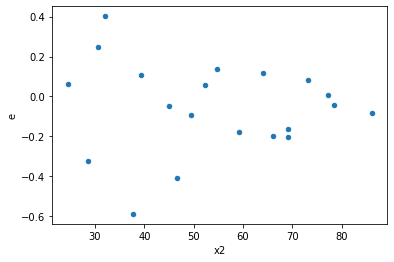

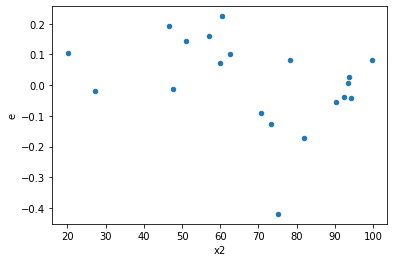

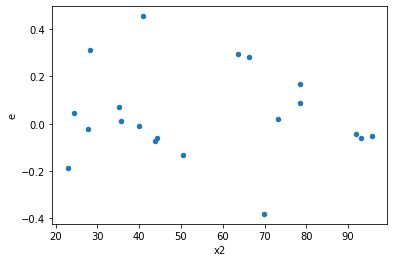

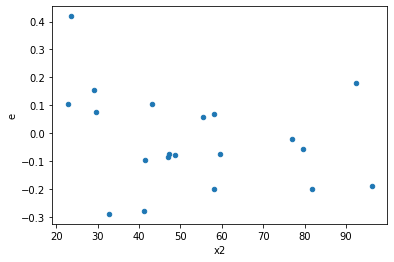

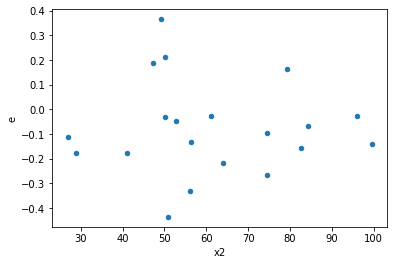

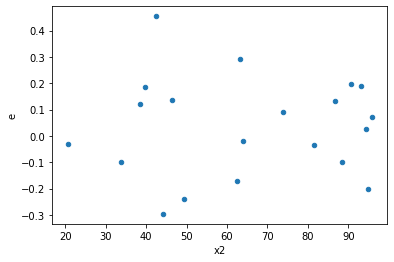

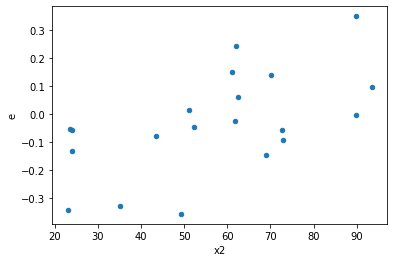

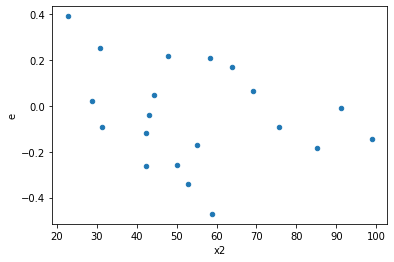

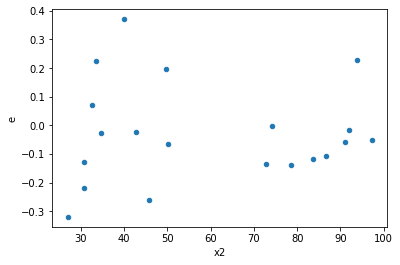

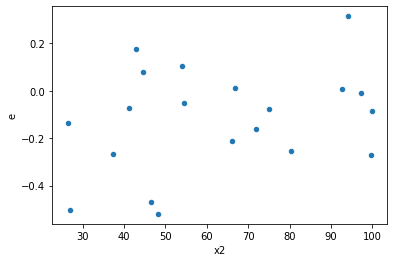

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,4.0,4.0,0.026611554696769943,0.12020144200478844,0.006652888674192486,0.03005036050119711,4.5168891248348695,0.1733126014119286,0.9133436992940357,0.0866563007059643,Reject005=1 : Homoscedasticity
7.0,4.0,4.0,0.06621248260355102,0.16680158366008502,0.016553120650887754,0.041700395915021254,2.519186369416382,0.3926929483588091,0.8036535258205955,0.19634647417940454,Reject005=1 : Homoscedasticity
8.0,4.0,4.0,0.0437029897164743,0.0765249549057341,0.010925747429118575,0.019131238726433526,1.7510233373550463,0.6006762532166303,0.6996618733916848,0.30033812660831516,Reject005=1 : Homoscedasticity
10.0,4.0,4.0,0.1549257727676613,0.17794995279834605,0.03873144319191533,0.04448748819958651,1.1486142661699907,0.8964142113093312,0.5517928943453344,0.4482071056546656,Reject005=1 : Homoscedasticity
11.0,4.0,4.0,0.016104624477185074,0.19844709275605,0.0040261561192962685,0.0496117731890125,12.322366972119337,0.032113915122358394,0.9839430424388208,0.016056957561179197,Reject005=0 : Heteroscedasticity
16.0,4.0,4.0,0.08079939107811451,0.153508620202293,0.020199847769528628,0.03837715505057325,1.899873478673686,0.5494688086051744,0.7252655956974128,0.2747344043025872,Reject005=1 : Homoscedasticity
17.0,4.0,4.0,0.02817080597712976,0.0807229355778651,0.00704270149428244,0.020180733894466275,2.8654819334384456,0.332299331099976,0.833850334450012,0.166149665549988,Reject005=1 : Homoscedasticity
21.0,4.0,4.0,0.0983414536367229,0.24277358348273237,0.024585363409180726,0.06069339587068309,2.4686800378154596,0.40283642289459287,0.7985817885527036,0.20141821144729644,Reject005=1 : Homoscedasticity
32.0,4.0,4.0,0.014477558514424433,0.08747907587380957,0.0036193896286061083,0.021869768968452392,6.042391456173463,0.1095267817306993,0.9452366091346504,0.05476339086534965,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,4.0,4.0,0.654092035163866,0.03126197685278249,0.1635230087909665,0.007815494213195622,0.04779446189854704,0.012104379407788596,Reject005=0 : Heteroscedasticity
1.0,4.0,4.0,0.026611554696769943,0.12020144200478844,0.006652888674192486,0.03005036050119711,4.5168891248348695,0.1733126014119286,Reject005=1 : Homoscedasticity
2.0,4.0,4.0,0.13806112677544172,0.08129051027539802,0.03451528169386043,0.020322627568849505,0.5888008607058389,0.6204514861450244,Reject005=1 : Homoscedasticity
3.0,4.0,4.0,0.1563725078365914,0.04545316767252987,0.03909312695914785,0.011363291918132467,0.2906723713865882,0.2586271461363173,Reject005=1 : Homoscedasticity
4.0,4.0,4.0,0.1663669601770715,0.024124250716753233,0.041591740044267876,0.006031062679188308,0.14500626020380944,0.08810517749605999,Reject005=1 : Homoscedasticity
5.0,4.0,4.0,0.12605645763820605,0.0756018176375762,0.031514114409551514,0.01890045440939405,0.5997456937474839,0.6325330812037911,Reject005=1 : Homoscedasticity
6.0,4.0,4.0,0.24925986929581392,0.09301469695963385,0.06231496732395348,0.023253674239908463,0.37316354703390653,0.36282651856307974,Reject005=1 : Homoscedasticity
7.0,4.0,4.0,0.06621248260355102,0.16680158366008502,0.016553120650887754,0.041700395915021254,2.519186369416382,0.3926929483588091,Reject005=1 : Homoscedasticity
8.0,4.0,4.0,0.0437029897164743,0.0765249549057341,0.010925747429118575,0.019131238726433526,1.7510233373550463,0.6006762532166303,Reject005=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      885
Reject005=0 : Heteroscedasticity    115
Name: Result_test, dtype: int64